In [1]:
from google.colab import files
uploaded = files.upload()

Saving Car_Price.csv to Car_Price.csv


In [83]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
# importing CarPrice_Assignment.csv with pandas

CarData= pd.read_csv('Car_Price.csv')

CarData.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [85]:
# Display general information about the dataset
# This includes the count of non-null entries per column, the data type of each column, and memory usage.
CarData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
# Generate descriptive statistics for numerical columns
# Provide information like mean, standard deviation, min, max, and quartiles.
CarData.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [91]:
# Extract the car's company's name from the variable 'CarName' into the variable 'CarCompany'

CarData['CarCompany'] = [value.split(' ')[0] for value in CarData['CarName']]

CarData = CarData.drop('CarName', axis=1)

CarData.CarCompany

,CarCompany
0,alfa-romero
1,alfa-romero
2,alfa-romero
3,audi
4,audi
...,...
200,volvo
201,volvo
202,volvo
203,volvo


In [92]:
# #checking the unique values under "CarCompany"
CarData.CarCompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [93]:
# replacing the mis-spelling with correct ones

# CarData.CarCompany = CarData.CarCompany.str.replace('toyouta', 'toyota')
# CarData.CarCompany = CarData.CarCompany.str.replace('Nissan', 'nissan')
# CarData.CarCompany = CarData.CarCompany.str.replace('maxda', 'mazda')
# CarData.CarCompany = CarData.CarCompany.str.replace('porcshce', 'porsche')
# CarData.CarCompany = CarData.CarCompany.str.replace(['vw', 'vokswagen'], 'volkswagen')
replacements = {
    'toyouta': 'toyota',
    'Nissan': 'nissan',
    'maxda': 'mazda',
    'porcshce': 'porsche',
    'vw': 'volkswagen',
    'vokswagen': 'volkswagen',
    'alfa-romero': 'alfa-romeo',
}

CarData['CarCompany'] = CarData['CarCompany'].replace(replacements)

# again checking the unique values
CarData.CarCompany.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

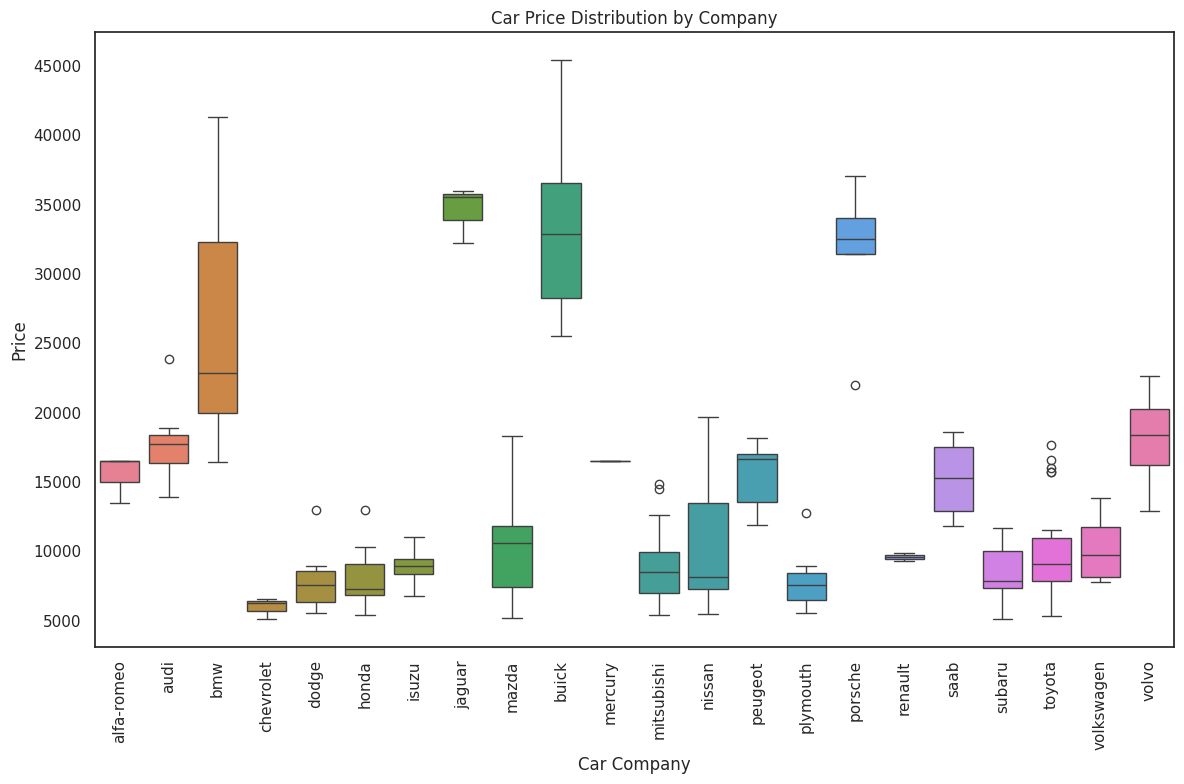

In [94]:
# Creates a boxplot
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
# sns.color_palette("tab10")
sns.set_theme(palette="pastel")
sns.set_style("white")
sns.boxplot(x='CarCompany', y='price', data=CarData, hue='CarCompany')
plt.xticks(rotation=90)
plt.title('Car Price Distribution by Company')
plt.xlabel('Car Company')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [ ]:
# Visualising 'CarComapny' variable aginst dependent variable 'price' via boxplot


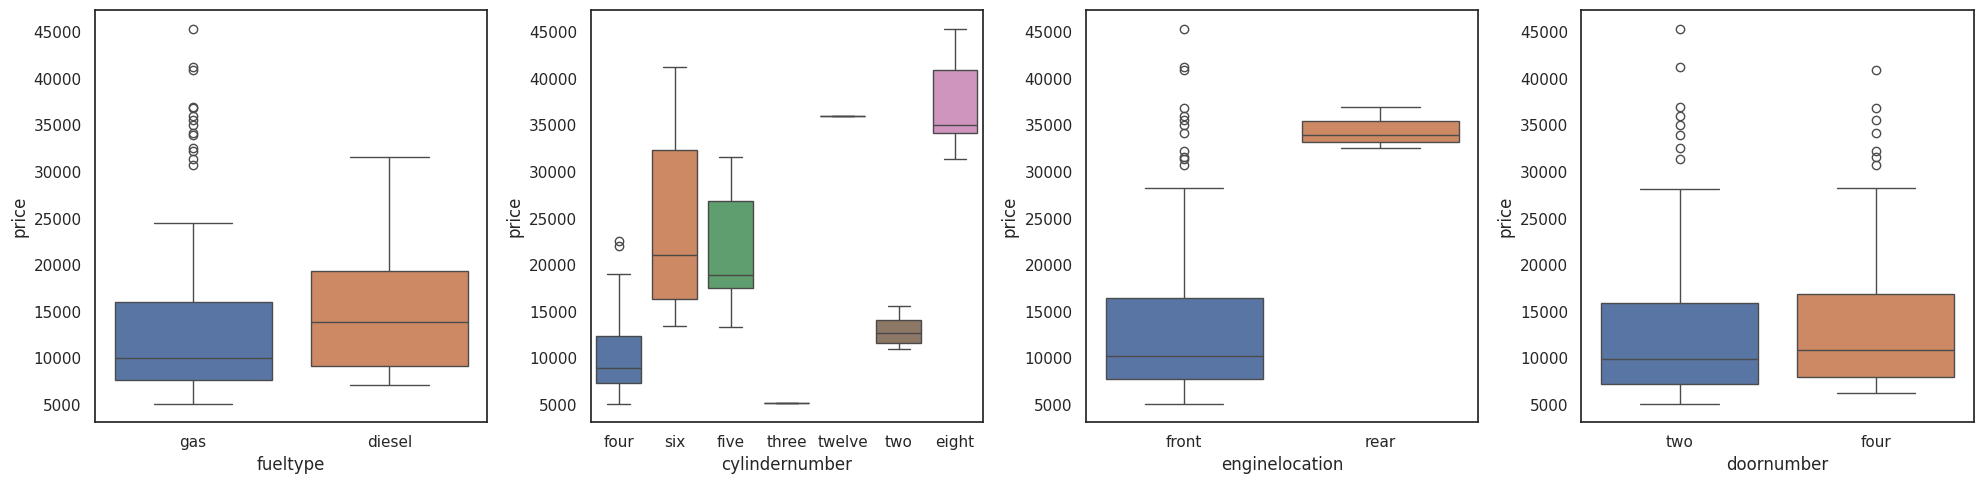

In [95]:
def create_boxplot(ax, x, y):
  sns.set_style("white")
  sns.boxplot(x=x, y=y, data=CarData, hue=x, ax=ax)
  ax.set_xlabel(x)
  ax.set_ylabel(y)
  plt.tight_layout()

sns.set_theme()
sns.set_style("white")
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
create_boxplot(axes[0], "fueltype", "price")
create_boxplot(axes[1], "cylindernumber", "price")
create_boxplot(axes[2], "enginelocation", "price")
create_boxplot(axes[3], "doornumber", "price")

In [ ]:
# Visualising Categorical variables through boxplots

...

Ellipsis

In [96]:
#creating a dict 'company price' where key = car's company and value = median of their price

backup = CarData.copy()

company_price = CarData.groupby('CarCompany')['price'].median().to_dict()
company_price

{'alfa-romeo': 16500.0,
 'audi': 17710.0,
 'bmw': 22835.0,
 'buick': 32892.0,
 'chevrolet': 6295.0,
 'dodge': 7609.0,
 'honda': 7295.0,
 'isuzu': 8916.5,
 'jaguar': 35550.0,
 'mazda': 10595.0,
 'mercury': 16503.0,
 'mitsubishi': 8499.0,
 'nissan': 8124.0,
 'peugeot': 16630.0,
 'plymouth': 7609.0,
 'porsche': 32528.0,
 'renault': 9595.0,
 'saab': 15275.0,
 'subaru': 7894.0,
 'toyota': 9103.0,
 'volkswagen': 9737.5,
 'volvo': 18420.0}

In [51]:
# reset, run this one not the above!
CarData = backup.copy()
CarData.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [97]:
# division in the buckets of low i.e. below 10000, medium i.e. range b/w 10000 and 20000 and high i.e. above 2000
bins = [0, 10000, 20000, float('inf')]
labels = ["low", "medium", "high"]
CarData['CarCompany'] = pd.cut(CarData['price'], bins=bins, labels=labels).astype(str)

CarData.CarCompany.unique()
CarData.head(29)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000,medium
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000,medium
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000,medium
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000,medium
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000,medium
5,6,2,gas,std,two,sedan,fwd,front,99.8,177.3,...,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000,medium
6,7,1,gas,std,four,sedan,fwd,front,105.8,192.7,...,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000,medium
7,8,1,gas,std,four,wagon,fwd,front,105.8,192.7,...,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000,medium
8,9,1,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000,high
9,10,0,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167,medium


In [98]:
#creating dummy variable for catwegorical variables
# one-hot encoding
CarData = pd.get_dummies(CarData)

#checking the dataset
CarData.head(29)
# CarData.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarCompany_high,CarCompany_low,CarCompany_medium
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,True,False,False,False,False,True
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,True,False,False,False,False,True
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,False,False,False,False,True,False,False,False,False,True
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,False,False,False,True,False,False,False,False,True
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,False,False,False,False,True,False,False,False,False,True
5,6,2,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,...,False,False,False,False,True,False,False,False,False,True
6,7,1,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,...,False,False,False,False,True,False,False,False,False,True
7,8,1,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,...,False,False,False,False,True,False,False,False,False,True
8,9,1,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,...,False,False,False,False,True,False,False,True,False,False
9,10,0,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,...,False,False,False,False,True,False,False,False,False,True


In [99]:
# importing required library
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
CarData_train, CarData_test = train_test_split(CarData, test_size=0.3, random_state=0)

# shape of the train and test sets
display(CarData_train.head())
display(CarData_test.head())
print(CarData_train.shape)
print(CarData_test.shape)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarCompany_high,CarCompany_low,CarCompany_medium
40,41,0,96.5,175.4,62.5,54.1,2372,110,3.15,3.580,...,False,False,False,False,False,False,False,False,False,True
60,61,0,98.8,177.8,66.5,55.5,2410,122,3.39,3.390,...,True,False,False,False,False,False,False,False,True,False
56,57,3,95.3,169.0,65.7,49.6,2380,70,3.33,3.255,...,False,True,False,False,False,False,False,False,False,True
101,102,0,100.4,181.7,66.5,55.1,3095,181,3.43,3.270,...,False,False,False,False,True,False,False,False,False,True
86,87,1,96.3,172.4,65.4,51.6,2405,122,3.35,3.460,...,True,False,False,False,False,False,False,False,True,False


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarCompany_high,CarCompany_low,CarCompany_medium
52,53,1,93.1,159.1,64.2,54.1,1905,91,3.03,3.15,...,True,False,False,False,False,False,False,False,True,False
181,182,-1,104.5,187.8,66.5,54.1,3151,161,3.27,3.35,...,False,False,False,False,True,False,False,False,False,True
5,6,2,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,...,False,False,False,False,True,False,False,False,False,True
18,19,2,88.4,141.1,60.3,53.2,1488,61,2.91,3.03,...,True,False,False,False,False,False,False,False,True,False
188,189,2,97.3,171.7,65.5,55.7,2300,109,3.19,3.40,...,False,False,False,False,True,False,False,False,True,False


(143, 57)
(62, 57)


In [101]:
y_train = CarData_train["price"]
X_train = CarData_train.drop("price", axis=1)

y_test = CarData_test["price"]
X_test = CarData_test.drop("price", axis=1)

In [102]:
#importing required function for scaling

from sklearn.preprocessing import MinMaxScaler

# Scaling the data
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [104]:
# Train your model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [105]:
# Making predictions
predicted_price = model.predict(X_test)

In [106]:
# Show predictions
predicted_price

array([ 6555.19932011, 15350.40208916, 13267.00490557, -2608.62426142,
        9679.04627501, 13005.89932919,  7302.85762536,  6499.73941325,
       14969.63539505,  7186.25826008, 21502.94240677, 38409.99157533,
       12746.8069465 , 14819.34767757,  7454.23798537, 10811.90543132,
        7175.84360852, 16531.32572205,  7896.72559962,  6865.56991349,
        9282.21751821, 17049.20356835,  7251.60162223, 13334.4155414 ,
       17588.75269858,  6984.72900565,  6685.10182594, 17426.85901364,
        6306.46444535,  5411.41860329,  8666.51691941, 11324.15727944,
       23820.40657503,  8956.67857136,  6172.24724056, 30719.33082686,
       13514.41303781, 16158.090474  ,  6260.1382594 , 38245.40881533,
        7134.71911406, 15861.72578067, 35568.05229456, 23041.85605003,
       13984.21245346,  7676.36665028,  7334.55084119, 13985.53702532,
       13040.92213301,  9481.84347988, 26897.48736915,  9327.39016915,
        7022.37383297, 10931.02021863, 20340.84549966, 15373.09321279,
      

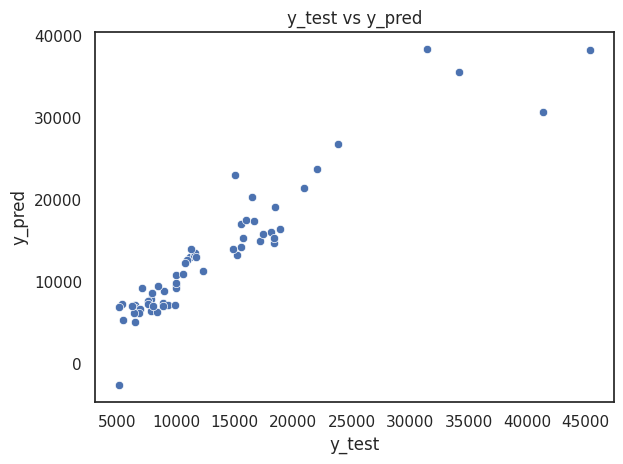

In [110]:
data = pd.DataFrame({'y_test': y_test, 'predicted_price': predicted_price})
# plt.figure(figsize=(12, 8))  # Adjust figure size as needed
# sns.color_palette("tab10")
sns.set_theme()
sns.set_style("white")
sns.scatterplot(data=data, x='y_test', y='predicted_price')
plt.title('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [111]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, predicted_price)

# Print the R-squared value
print("R-squared:", r2)

R-squared: 0.8814310540029071
